<font color='#00bd42'>**This color for INSIGHTS**</fond>

<font color='#048ad2'>**This color for HEADING**</fond>

<font color='#f5110a'>**This color for CODE**</fond>

<font color='#ecff5f'>**This color for CODE BASED ON INSIGHTS**</fond>

<font color='#fe9fe5'>**This color for PLOTS AND CHARTS**</fond>


In [4]:
import pandas as pd

df = pd.read_csv('loan_prediction.csv')
print(f"Dataset shape: {df.shape}")
df.head(10)

Dataset shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# View columns for df

print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


<font color='#00bd42'>**BASED ON INSIGHTS**</fond>

<font color='#00bd42'>**Insights from df.info()**</fond>


        * There are null values in data

<font color='#048ad2'>**Header**</fond>

### <font color='#048ad2'>**Duplicates & Missing Values**</fond>

<font color='#f5110a'>**CODE**</fond>

<font color='#f5110a'>**Duplicates**</fond>

In [ ]:
# Get the number of original rows
num_original_rows = len(df)
print(f"Number of Original Rows: {num_original_rows}")

# Identify and display duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of Duplicate Rows: {num_duplicates}")

# Drop duplicate rows and keep the first occurrence
df_no_duplicates = df.drop_duplicates()

# Print the number of remaining rows after removing duplicates
num_remaining_rows = len(df_no_duplicates)
print(f"\nNumber of Remaining Rows after Removing Duplicates: {num_remaining_rows}")


Number of Original Rows: 614

Number of Duplicate Rows: 0

Number of Remaining Rows after Removing Duplicates: 614


<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**from Duplicates**</fond>


        * There are no duplicates rows

<font color='#f5110a'>**CODE**</fond>

<font color='#f5110a'>**missing values and data types**</fond>

In [5]:
# Check missing values and data types, with percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percentage.round(2)
})

print("🔍 Missing Values (Count & Percentage):")
print(missing_info)

print("\n🧬 Data Types:")
print(df.dtypes)


🔍 Missing Values (Count & Percentage):
                   Missing Count  Missing %
Loan_ID                        0       0.00
Gender                        13       2.12
Married                        3       0.49
Dependents                    15       2.44
Education                      0       0.00
Self_Employed                 32       5.21
ApplicantIncome                0       0.00
CoapplicantIncome              0       0.00
LoanAmount                    22       3.58
Loan_Amount_Term              14       2.28
Credit_History                50       8.14
Property_Area                  0       0.00
Loan_Status                    0       0.00

🧬 Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Ar

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**from missing values:**</fond>

        * to avoid errors in modeling and ensures data quality we need to fix these:


        1- missing values (LoanAmount, Credit_History) need to impute or drop them.
        2- Missing categorical values (Gender, Self_Employed) fill with mode (most frequent).
        3- Missing numerical values (LoanAmount) can be filled with the median or mean.

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**from data types:**</fond>

        1- Categorical features: Gender, Married, Education, etc..
           These need to be encoded (Label Encoding or One-Hot Encoding).
        2- Numerical features: ApplicantIncome, LoanAmount, etc.
           Need scaling (e.g. StandardScaler or MinMaxScaler).
        3- Loan_ID: Likely just an identifier — not useful for prediction (drop it).
        4- Loan_Status: This is the target variable (Yes = Approved, No = Rejected)

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**Additional**</fond>

        1- Dependants has values with characters like '+'

<font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**Drop, Fill missing**</fond>

In [6]:
# Drop 'Loan_ID'
df = df.drop('Loan_ID', axis=1)

# Fill missing categorical values with mode (safe assignment)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


<font color='#f5110a'>**CODE**</fond>

<font color='#f5110a'>**New Check on missing values**</fond>

In [ ]:
#Check for missing values

missing_values = df.isnull().sum()
data_types = df.dtypes

print("Missing Values:")
print(missing_values)


Missing Values:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<font color='#048ad2'>**Header**</fond>

# <font color='#048ad2'>**Visualizations**</fond>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <font color='#ffdff7'>**Categorical Feature Distributions**</fond>

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Gender**</fond>

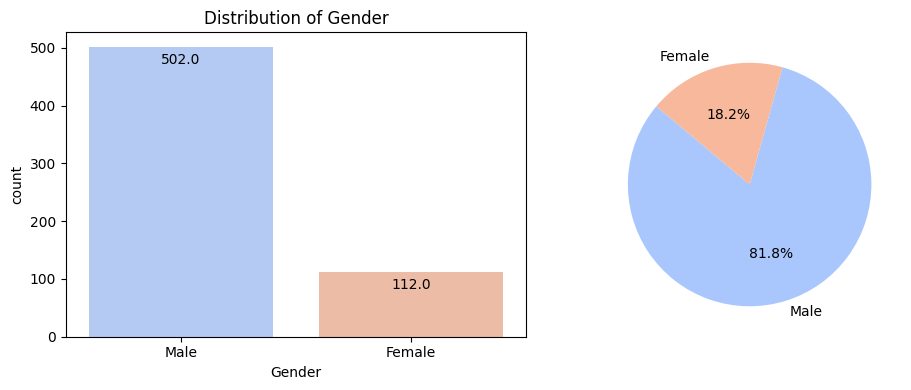

In [69]:
plt.figure(figsize=(10, 4))

# Define palette colors to reuse for pie chart
palette = sns.color_palette("coolwarm", n_colors=df['Gender'].nunique())

# Subplot 1: Countplot
ax1 = plt.subplot(1, 2, 1)
ax = sns.countplot(x='Gender', hue='Gender', data=df, palette=palette, legend=False, ax=ax1)
plt.title('Distribution of Gender')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height() - 10),
                ha='center', va='top')

# Subplot 2: Pie chart
ax2 = plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Marital Status**</fond>

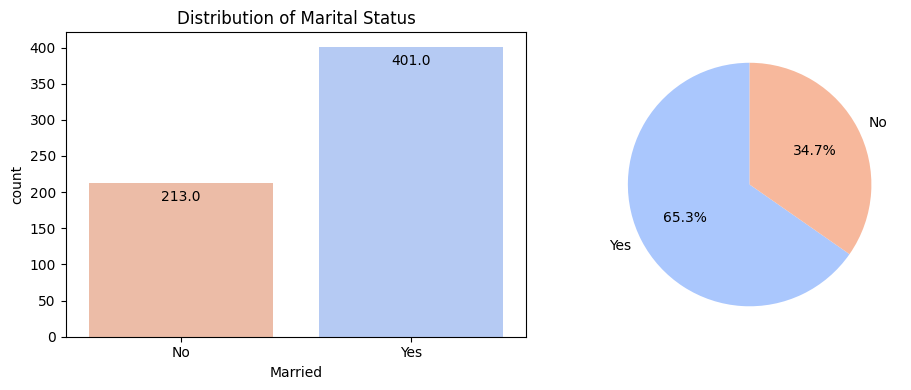

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Get categories and their counts in order
categories = df['Married'].value_counts().index.tolist()
counts = df['Married'].value_counts().values

# Create a palette with consistent colors for categories
palette = dict(zip(categories, sns.color_palette('coolwarm', n_colors=len(categories))))

# Plot countplot with color palette
ax = sns.countplot(x='Married', data=df, palette=palette, ax=axs[0])
axs[0].set_title('Distribution of Marital Status')
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                    ha='center', va='top')

# Plot pie chart with same colors in same order as categories
axs[1].pie(counts, labels=categories, autopct='%1.1f%%',
           colors=[palette[c] for c in categories], startangle=90)

plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Education**</fond>

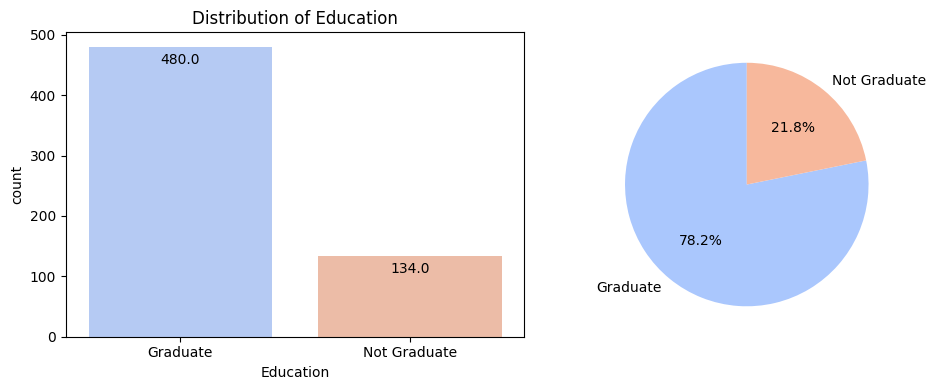

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = sns.countplot(x='Education', hue='Education', data=df, palette='coolwarm', legend=False, ax=axs[0])
axs[0].set_title('Distribution of Education')
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                    ha='center', va='top')

counts = df['Education'].value_counts()
colors = sns.color_palette('coolwarm', n_colors=len(counts))
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Self Employment**</fond>

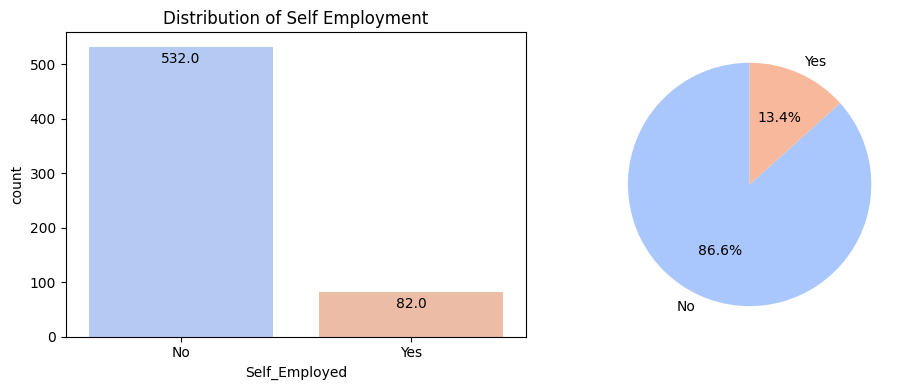

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = sns.countplot(x='Self_Employed', hue='Self_Employed', data=df, palette='coolwarm', legend=False, ax=axs[0])
axs[0].set_title('Distribution of Self Employment')
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                    ha='center', va='top')

counts = df['Self_Employed'].value_counts()
colors = sns.color_palette('coolwarm', n_colors=len(counts))
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Property Area**</fond>

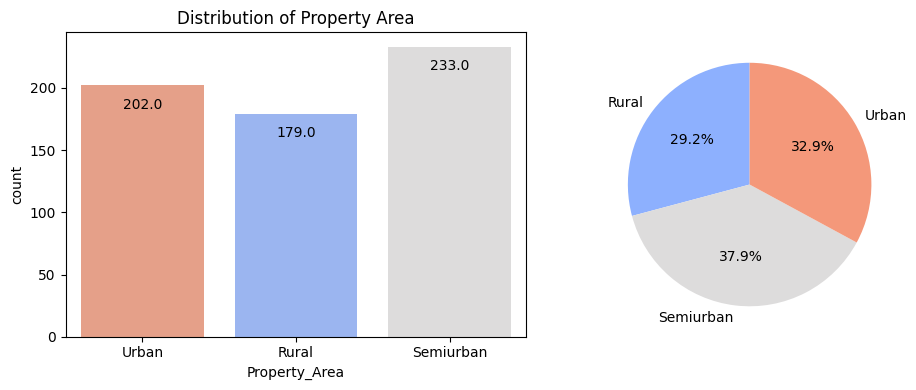

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Get sorted unique categories
categories = sorted(df['Property_Area'].unique())

# Get palette with the same number of colors as categories
palette = sns.color_palette('coolwarm', n_colors=len(categories))

# Create a color map {category: color}
color_map = dict(zip(categories, palette))

# Countplot with hue as Property_Area (to use colors per category)
ax = sns.countplot(x='Property_Area', data=df, palette=color_map, ax=axs[0])
axs[0].set_title('Distribution of Property Area')

# Annotate bars
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2, p.get_height() - 10),
                    ha='center', va='top')

# Pie chart with colors in the same order as categories
counts = df['Property_Area'].value_counts().reindex(categories)
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=[color_map[c] for c in counts.index], startangle=90)

plt.tight_layout()
plt.show()

## <font color='#ffdff7'>**Numerical Features Analysis**</fond>

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**ApplicantIncome**</fond>

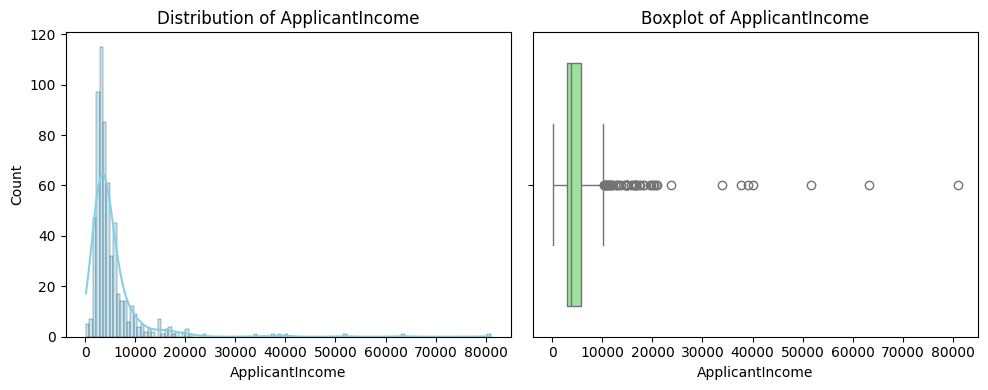

In [21]:
plt.figure(figsize=(10, 4))

# Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Distribution of ApplicantIncome')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ApplicantIncome'], color='lightgreen')
plt.title('Boxplot of ApplicantIncome')

plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**CoapplicantIncome**</fond>

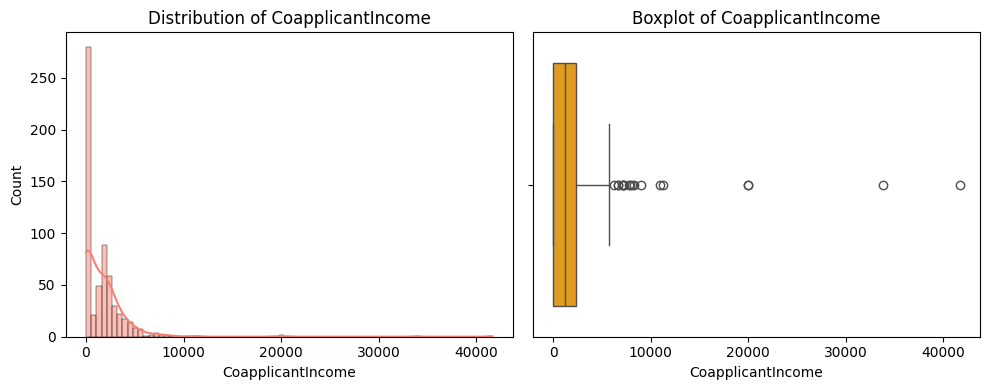

In [22]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['CoapplicantIncome'], kde=True, color='salmon')
plt.title('Distribution of CoapplicantIncome')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['CoapplicantIncome'], color='orange')
plt.title('Boxplot of CoapplicantIncome')

plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**LoanAmount**</fond>

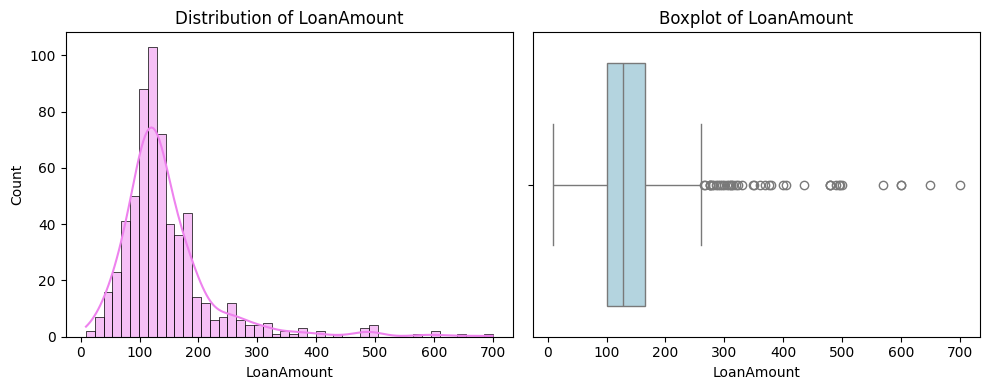

In [24]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['LoanAmount'], kde=True, color='violet')
plt.title('Distribution of LoanAmount')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['LoanAmount'], color='lightblue')
plt.title('Boxplot of LoanAmount')

plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Credit_History**</fond>

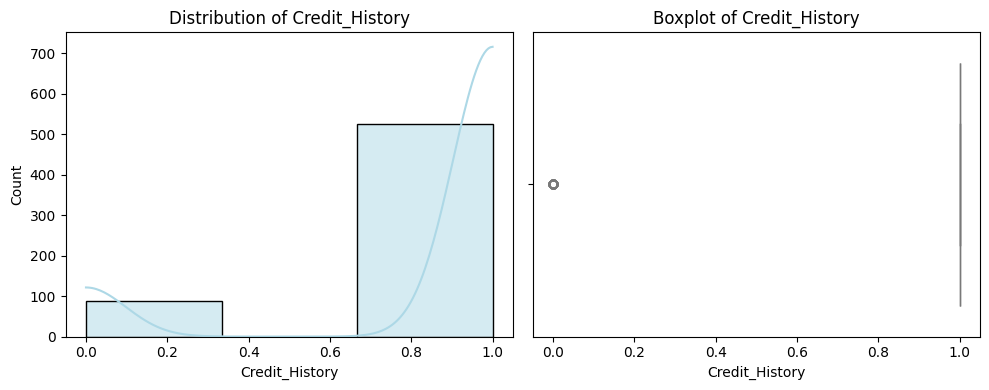

In [27]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Credit_History'], kde=True, bins=3, color='lightblue')
plt.title('Distribution of Credit_History')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Credit_History'], color='palegreen')
plt.title('Boxplot of Credit_History')

plt.tight_layout()
plt.show()

## <font color='#ffdff7'>**Correlation Analysis**</fond>

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Correlation Matrix of Numerical Features**</fond>

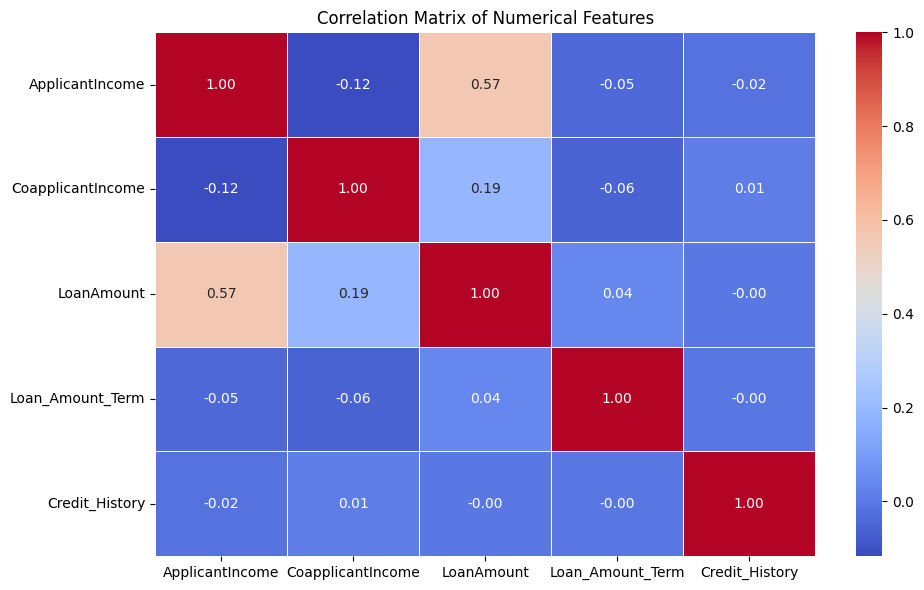

In [33]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Target Variable Analysis: Class Distribution**</fond>

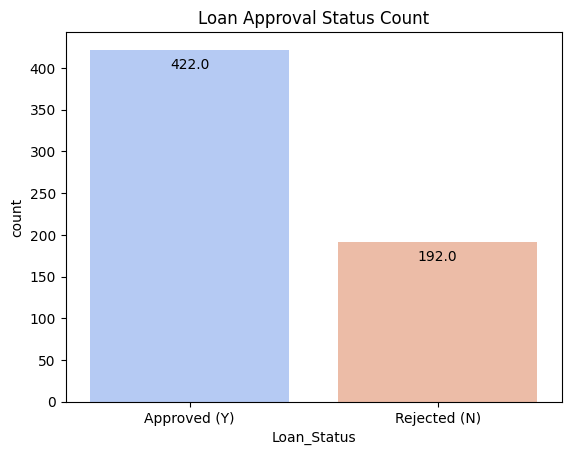

Class Imbalance Ratio (Approved : Rejected) = 422:192 ≈ 2.2:1


In [44]:
ax = sns.countplot(x='Loan_Status', hue='Loan_Status', data=df, palette='coolwarm', legend=False)
plt.title('Loan Approval Status Count')
plt.xticks([0, 1], ['Approved (Y)', 'Rejected (N)'])

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                ha='center', va='top')

plt.show()

# Print class imbalance ratio
value_counts = df['Loan_Status'].value_counts()
count_0 = value_counts.get(0, 0)  # Approved
count_1 = value_counts.get(1, 0)  # Rejected
ratio = round(count_0 / count_1, 2) if count_0 != 0 else '∞'
print(f"Class Imbalance Ratio (Approved : Rejected) = {count_0}:{count_1} ≈ {ratio}:1")

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Categorical Features vs Target**</fond>



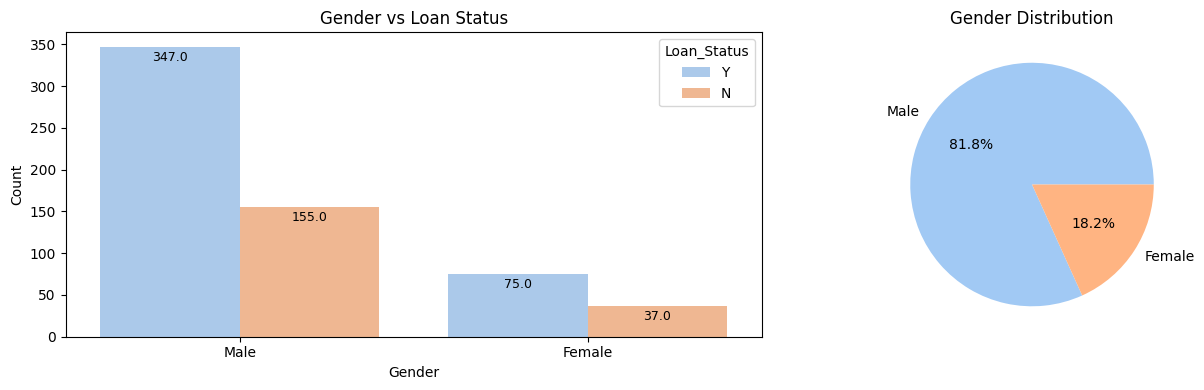

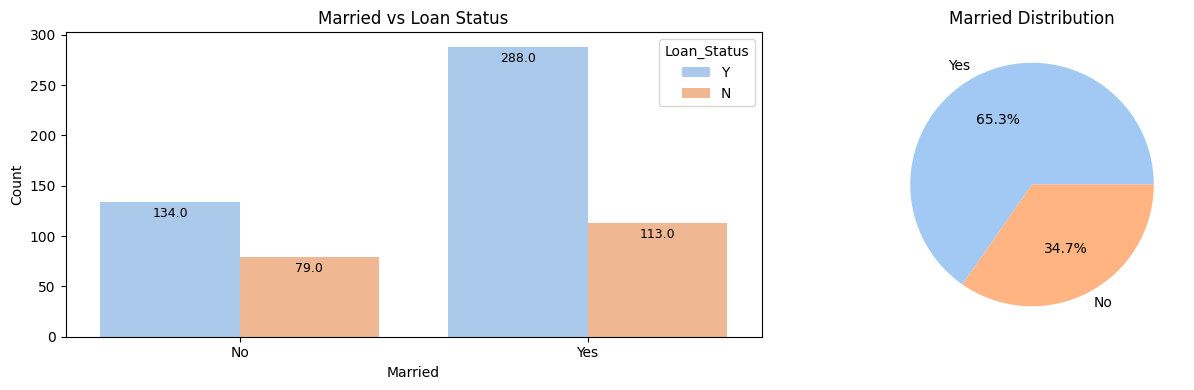

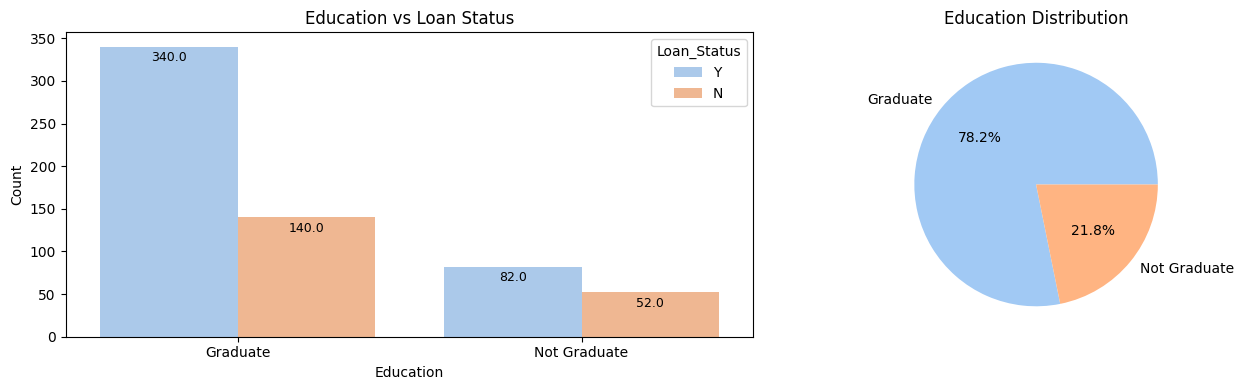

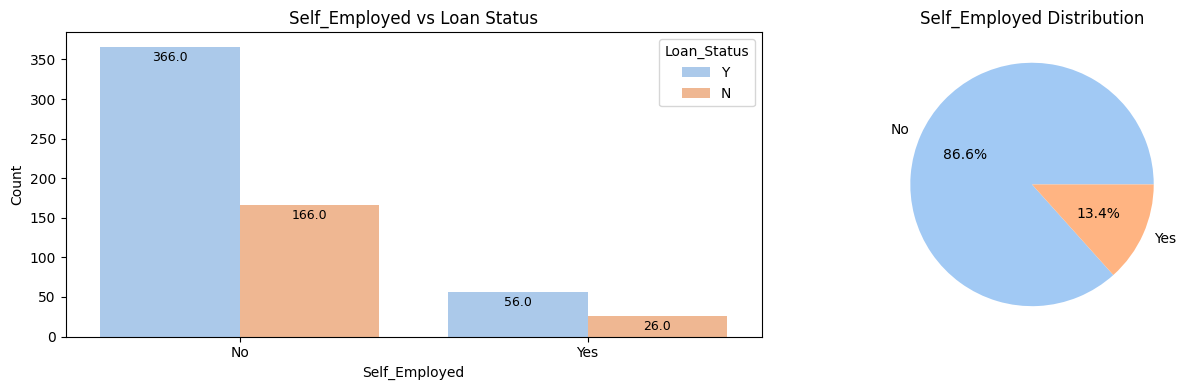

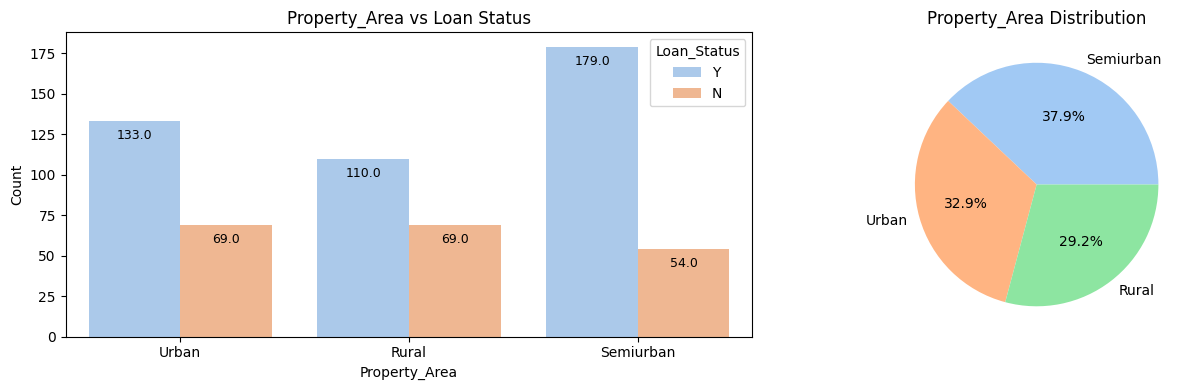

In [51]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Countplot with Loan_Status hue
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='pastel', ax=axes[0])
    axes[0].set_title(f'{col} vs Loan Status')
    axes[0].set_ylabel('Count')

    # Add annotations on countplot bars
    for p in axes[0].patches:
        height = p.get_height()
        axes[0].annotate(f'{height}',
                         (p.get_x() + p.get_width() / 2., height - 5),
                         ha='center', va='top', fontsize=9)

    # Pie chart for overall distribution of the categorical column
    counts = df[col].value_counts()
    axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(counts)))
    axes[1].set_title(f'{col} Distribution')

    plt.tight_layout()
    plt.show()

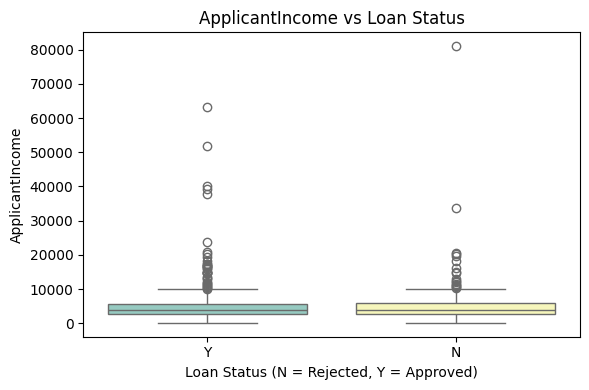

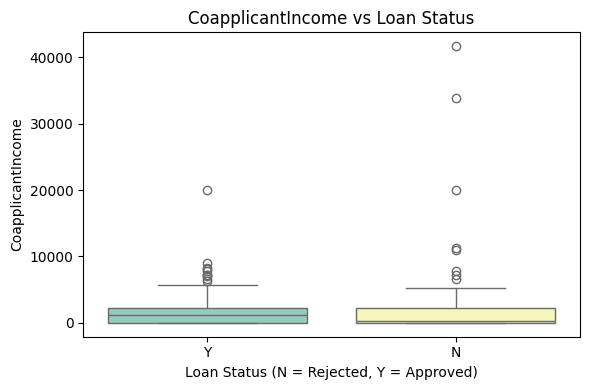

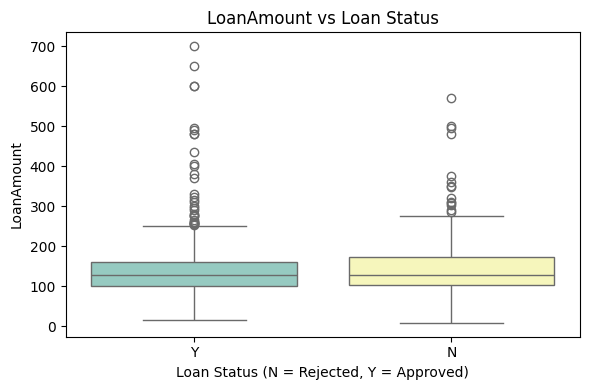

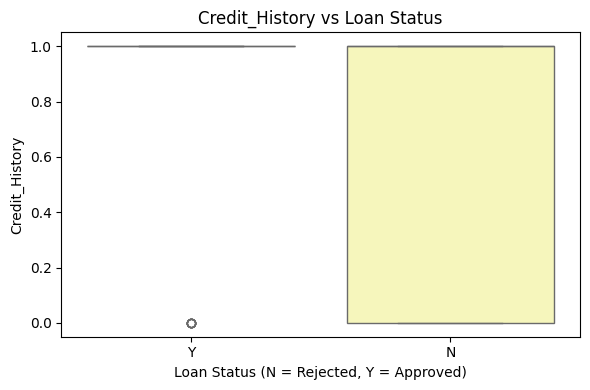

In [52]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Loan_Status', y=col, palette='Set3')
    plt.title(f'{col} vs Loan Status')
    plt.xlabel('Loan Status (N = Rejected, Y = Approved)')
    plt.tight_layout()
    plt.show()

## <font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**The values 3+ will make problems so convert it to 3**</fond>

In [ ]:
# Convert '3+' to 3 and cast to int
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

<font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**Encode Categorical Variables**</fond>

In [ ]:
# Convert 'Y' → 1 and 'N' → 0:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
# We’ll use One-Hot Encoding to avoid ordering bias:
# One-hot encode remaining categorical features
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education','Self_Employed', 'Property_Area'], drop_first=True)

In [ ]:
df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True
5,2,5417,4196.0,267.0,360.0,1.0,1,True,True,False,True,False,True
6,0,2333,1516.0,95.0,360.0,1.0,1,True,True,True,False,False,True
7,3,3036,2504.0,158.0,360.0,0.0,0,True,True,False,False,True,False
8,2,4006,1526.0,168.0,360.0,1.0,1,True,True,False,False,False,True
9,1,12841,10968.0,349.0,360.0,1.0,0,True,True,False,False,True,False
